# **Credit Card Fraud Detection Model**

In [48]:
import numpy as np
import pandas as pd

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**STEP 1: UPLOAD DATASET FILES**

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/fraudTrain.csv") #To download dataset visit https://www.kaggle.com/datasets/kartik2112/fraud-detection
test = pd.read_csv("/content/drive/MyDrive/fraudTest.csv")

**STEP 2: VISUALIZE DATASETS**

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

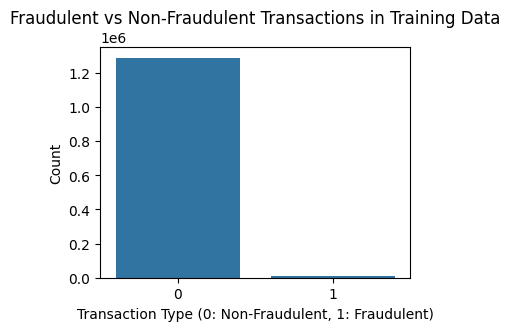

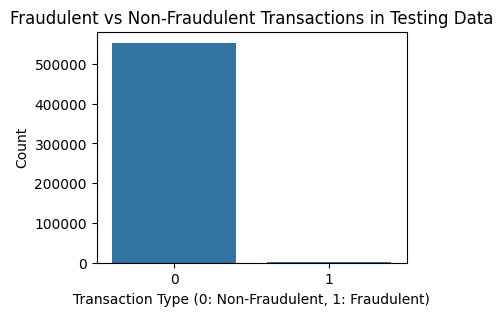

In [44]:
plt.figure(figsize=(4, 3))
sns.countplot(data=train, x='is_fraud')
plt.title('Fraudulent vs Non-Fraudulent Transactions in Training Data')
plt.xlabel('Transaction Type (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(4, 3))
sns.countplot(data=test, x='is_fraud')
plt.title('Fraudulent vs Non-Fraudulent Transactions in Testing Data')
plt.xlabel('Transaction Type (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()


**STEP 3: CONVERT TRAINING DATA STRING VALUES INTO NUMERICAL VALUES**

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoders = {}
for column in train.columns:
    if train[column].dtype == 'object':  # Check if column is a string
        label_encoders[column] = LabelEncoder()
        # Fit on combined data of train and test to include all possible labels
        all_data = pd.concat([train[column], test[column]], ignore_index=True).astype(str)
        label_encoders[column].fit(all_data.astype(str))
        train[column] = label_encoders[column].transform(train[column].astype(str))

In [28]:
X_train = train.drop(columns=['is_fraud'])
y_train = train['is_fraud']

**STEP 4: TRAIN THE MODEL**

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
print("Model trained successfully on the training data.")

Model trained successfully on the training data.


**STEP 5: CONVERT TESTING DATA STRING VALUES INTO NUMERICAL VALUES**

In [32]:
for column in test.columns:
   if column in label_encoders and column != 'Unnamed: 0':
            test[column] = label_encoders[column].transform(test[column].astype(str))

In [33]:
X_test = test[X_train.columns]  # Use only columns present in training

**STEP 6: TEST THE MODEL**

In [45]:
test_predictions = model.predict(X_test)

In [47]:
fraud_count = (test_predictions == 1).sum()
non_fraud_count = (test_predictions == 0).sum()
print(f"Fraudulent Transactions: {fraud_count}")
print(f"Non-Fraudulent Transactions: {non_fraud_count}")

transaction_results = pd.DataFrame({
    'Transaction_ID': test['Unnamed: 0'],
    'Prediction': test_predictions
})

transaction_results['Prediction'] = transaction_results['Prediction'].map({0: 'Legitimate', 1: 'Fraudulent'})

print("Transaction Predictions:\n", transaction_results)

Fraudulent Transactions: 6539
Non-Fraudulent Transactions: 549180
Transaction Predictions:
         Transaction_ID  Prediction
0                    0  Legitimate
1                    1  Legitimate
2                    2  Legitimate
3                    3  Legitimate
4                    4  Legitimate
...                ...         ...
555714          555714  Legitimate
555715          555715  Legitimate
555716          555716  Legitimate
555717          555717  Legitimate
555718          555718  Legitimate

[555719 rows x 2 columns]
